In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset

In [2]:
df=pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<ipython-input-4-ff6d10e982e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="viridis")


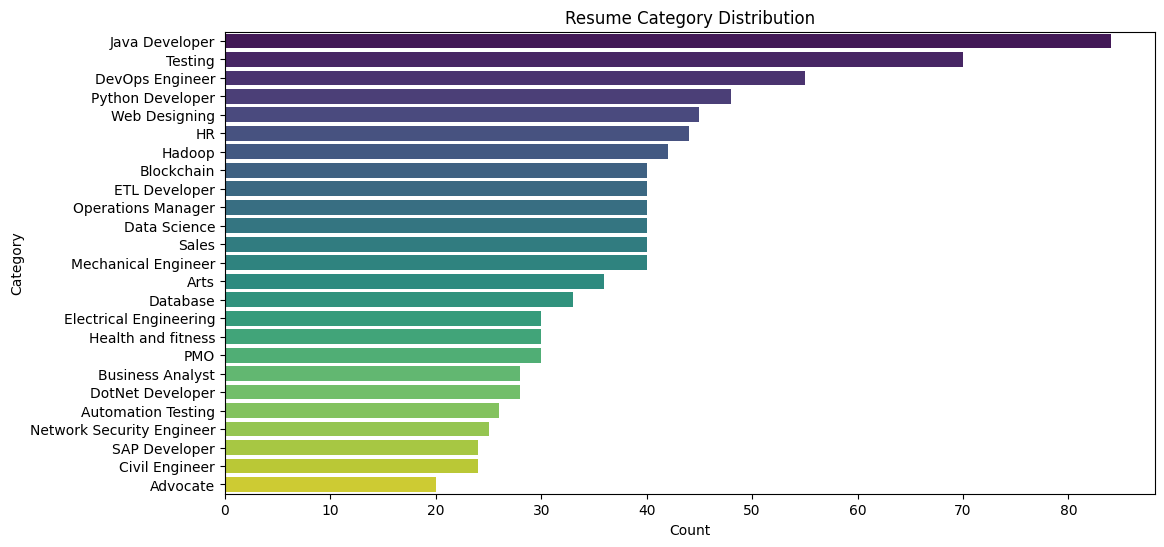

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="viridis")
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [8]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['Processed_Resume'] = df['Resume'].apply(preprocess_text)

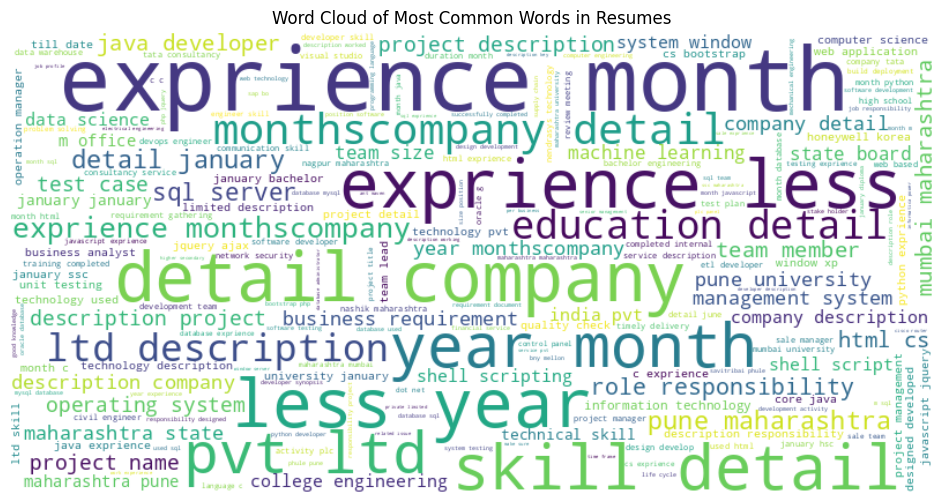

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["Processed_Resume"]))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Resumes")
plt.show()

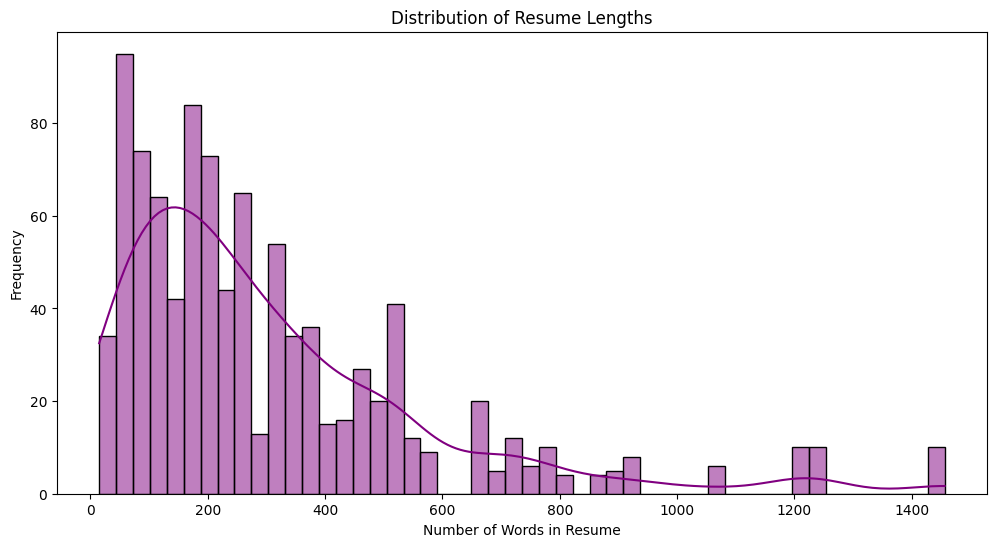

In [11]:
df["resume_length"] = df["Processed_Resume"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(df["resume_length"], bins=50, kde=True, color="purple")
plt.title("Distribution of Resume Lengths")
plt.xlabel("Number of Words in Resume")
plt.ylabel("Frequency")
plt.show()

In [12]:
df.head()

,Category,Resume,Processed_Resume,resume_length
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,488
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uitrgpv data scientis...,118
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,180
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,715
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,49


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          962 non-null    object
 1   Resume            962 non-null    object
 2   Processed_Resume  962 non-null    object
 3   resume_length     962 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 30.2+ KB


In [14]:
df["Category"].nunique()

25

In [15]:
df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


In [16]:
from imblearn.over_sampling import RandomOverSampler

# Define features and target
X = df.drop(columns = ['Category', 'Resume','resume_length'])
y = df["Category"]  # Target

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=["Category"])], axis=1)

# Check new value counts
print(df_resampled["Category"].value_counts())

Category
Data Science                 84
Electrical Engineering       84
Blockchain                   84
DotNet Developer             84
ETL Developer                84
Hadoop                       84
Database                     84
PMO                          84
Network Security Engineer    84
DevOps Engineer              84
Python Developer             84
Operations Manager           84
Automation Testing           84
HR                           84
SAP Developer                84
Business Analyst             84
Java Developer               84
Civil Engineer               84
Health and fitness           84
Sales                        84
Mechanical Engineer          84
Web Designing                84
Arts                         84
Advocate                     84
Testing                      84
Name: count, dtype: int64


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_resampled['Processed_Resume'])  # Convert text to TF-IDF vectors
y = df_resampled['Category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dt.score(X_train,y_train)

1.0

In [20]:
from sklearn.model_selection import GridSearchCV
dt_param_grid = {
    'criterion': ['gini', 'entropy'],      # Splitting criteria
    'max_depth': [10, 20, 30, None],       # Maximum tree depth
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 5]          # Min samples at leaf node
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Accuracy for Decision Tree:", dt_grid_search.best_score_)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy for Decision Tree: 0.9988095238095237


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = dt.predict(X_test)

# Print classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        17
       Automation Testing       1.00      1.00      1.00        17
               Blockchain       1.00      1.00      1.00        17
         Business Analyst       1.00      1.00      1.00        17
           Civil Engineer       1.00      1.00      1.00        17
             Data Science       1.00      1.00      1.00        17
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      1.00      1.00        16
         DotNet Developer       1.00      1.00      1.00        17
            ETL Developer       1.00      1.00      1.00        17
   Electrical Engineering       1.00      1.00      1.00        16
                       HR       1.00      1.00      1.00        17
                   Had

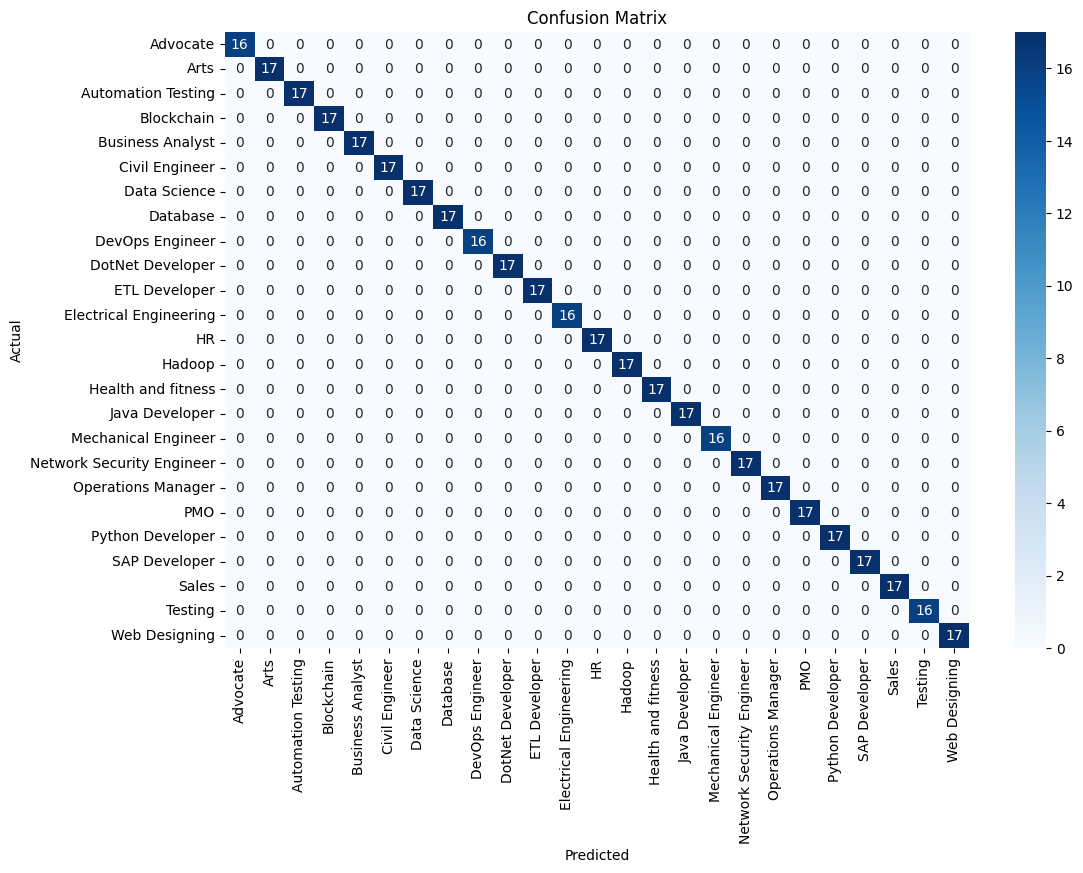

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

1.0

In [24]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best Accuracy: 1.0


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        17
       Automation Testing       1.00      1.00      1.00        17
               Blockchain       1.00      1.00      1.00        17
         Business Analyst       1.00      1.00      1.00        17
           Civil Engineer       1.00      1.00      1.00        17
             Data Science       1.00      1.00      1.00        17
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      1.00      1.00        16
         DotNet Developer       1.00      1.00      1.00        17
            ETL Developer       1.00      1.00      1.00        17
   Electrical Engineering       1.00      1.00      1.00        16
                       HR       1.00      1.00      1.00        17
                   Had

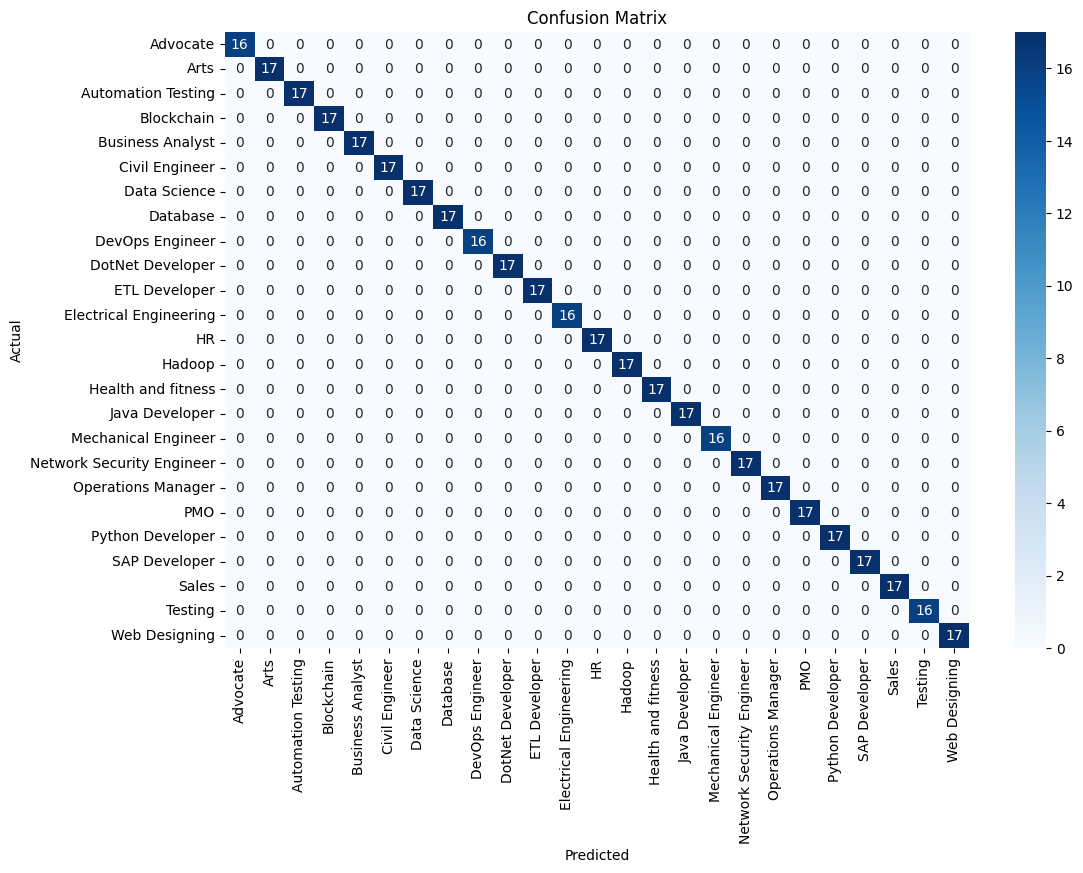

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import pickle

# Save the trained model
with open("decisiontree.pkl", "wb") as file:
    pickle.dump(dt, file)

In [29]:
with open("randomforest.pkl", "wb") as file:
    pickle.dump(rf, file)